# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Is the Distribution Normal? 


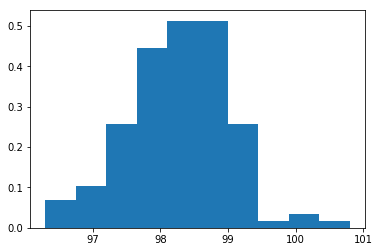

In [2]:
plt.hist(df.temperature,density=True,bins=10)
plt.show()

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

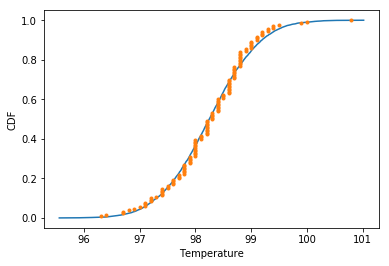

In [4]:
mu_temp = np.mean(df.temperature)
sigma_temp = np.std(df.temperature)

samples = np.random.normal(mu_temp,sigma_temp,size=10000)
x_sample, y_sample = ecdf(samples)
x,y = ecdf(df.temperature)

_ = plt.plot(x_sample, y_sample)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
plt.show()

# Using the Normaltest, the p value is above 5%, thus proving that this is a normal distribution.

In [5]:
k2,p=stats.normaltest(df.temperature)

if p >.05:
    print("Normal Distribution")
    print("P Value: ",p)
else:
    print("Not Normal Distribution")
    print("P Value: ",p)

Normal Distribution
P Value:  0.2587479863488254


# Is the sample size large? Are the observations independent?

Sample size > 30 and the samples are independent as long as they are taken from 130 different people. 


In [6]:
len(df.temperature)

130

## Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
    H0: True population mean is 98.6
    Ha: True popluation != 98.6



Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    Use a 1-sample test because we are only comparing the sample mean to the population mean, instead of 2 samples together. 

In this situation, is it appropriate to use the  t  or  z  statistic?
    It is more appropriate to use the z test, but they will yield the same result because N is greater than 30.
    

In [7]:
# Bootstrap 
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates


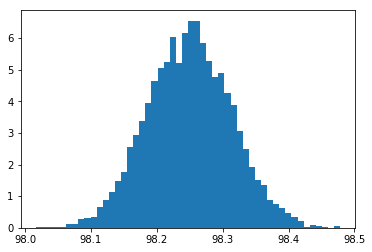

Bootstrap STD:  0.06350726695365716
SEM:  0.06405661469519336


In [8]:
temp_bs_rep = draw_bs_reps(df.temperature,np.mean,size=10000)

plt.hist(temp_bs_rep,bins=50,density=True)
plt.show()

print("Bootstrap STD: ", str(np.std(temp_bs_rep)))
print("SEM: ", str(np.std(df.temperature)/np.sqrt(len(df.temperature))))

In [9]:
print(np.percentile(temp_bs_rep,[2.5,97.5]))

print(np.sum(temp_bs_rep >= 98.6)/len(temp_bs_rep))

[98.12615385 98.37461538]
0.0


In [11]:
#translate Mean to 98.6 to test hypothesis
translated_temp = df.temperature - np.mean(df.temperature) + 98.6
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

if p < .05:
    print("Reject H0 hypothesis.") 
    print("P Value: ", p)
else:
    print("H0 is failed to be rejected")
    print("P Value: ", p)

Reject H0 hypothesis.
P Value:  0.0


In [13]:
# Temperature Descriptive Stats

std = np.std(df.temperature)
mean = np.mean(df.temperature)
length = len(df.temperature)

In [14]:
#Z-Value

z_value = (mean-98.6)/(std/length**.5)
z_value

-5.475925202078116

In [15]:
PValue = stats.norm.cdf(z_value) * 2
PValue

4.3523151658821886e-08

In [16]:
print("Z Test Results:")

if PValue < .05:
    print("Reject H0 hypothesis.")
    
else:
    print("H0 is failed to be rejected")
    
    
    

Z Test Results:
Reject H0 hypothesis.


In [17]:
#compute Margin of Error for T Value and Z Value
critical_t_value = stats.t.ppf(1-.025,129)
tval_moe = critical_t_value*std/np.sqrt(length)

critical_z_value = stats.norm.ppf(.975)
zval_moe = std*critical_z_value/np.sqrt(length)

print("T Value Margin of Error ", tval_moe)
print("Z Value Margin of Error ", zval_moe)

T Value Margin of Error  0.12673758101436725
Z Value Margin of Error  0.12554865777413815


In [18]:
# Range of true mean using z-statistic with 95% confidence level
mean_z_lower=mean-zval_moe
mean_z_upper=mean+zval_moe

# Range of true mean using t- statistic with 95% confidence level, n=130 so degrees of freedom=129
mean_t_lower=mean-tval_moe
mean_t_upper=mean+tval_moe

In [19]:
print("Using z-test with 95% conf. level, range of true mean is ", 
      round(mean_z_lower,2), " F to ", round(mean_z_upper,2), " F.")

print("Using t-test with 95% conf. level, range of true mean is ", 
      round(mean_t_lower,2), " F to ", round(mean_t_upper,2), " F.")

Using z-test with 95% conf. level, range of true mean is  98.12  F to  98.37  F.
Using t-test with 95% conf. level, range of true mean is  98.12  F to  98.38  F.


When sample size decreases to 10, we must use a t-test to test hypothesis. This tells us that t-test gives a larger chance for the true mean to be within confidence interval.

In [73]:
smallsample_replicates = np.random.choice(df.temperature,10)
#draw_bs_reps(translated_temp, np.mean, 10)
ss_mean = np.mean(smallsample_replicates)
ss_std = np.std(smallsample_replicates)
ss_len = len(smallsample_replicates)

t_val = (ss_mean-98.6)/(ss_std/ss_len**.5)
p = 1 - stats.t.cdf(t_val,df=ss_len-1)


if p < .05:
    print("Reject H0 hypothesis.") 
    print("P Value: ", p)
else:
    print("H0 is failed to be rejected")
    print("P Value: ", p)
    
    


H0 is failed to be rejected
P Value:  0.8783333736564977


In [80]:
smallsample_replicates = np.random.choice(df.temperature,10)
ss_mean = np.mean(smallsample_replicates)
ss_std = np.std(smallsample_replicates)
ss_len = len(smallsample_replicates)

z_val = (ss_mean-98.6)/(ss_std/ss_len**.5)
p = stats.norm.cdf(z_val)

if p < .05:
    print("Reject H0 hypothesis.") 
    print("P Value: ", p)
else:
    print("H0 is failed to be rejected")
    print("P Value: ", p)
    

Reject H0 hypothesis.
P Value:  0.0036305697311657483


# At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [82]:
#Bootstrap
Critical_value = 1.645
SEM = np.std(bs_replicates)/np.sqrt(len(df.temperature))
bs_replicates = draw_bs_reps(df.temperature,np.mean,size=10000)

MarginOfError = Critical_value * SEM
print("Bootstrap Margin of Error: ", MarginOfError)
mean_upper = np.mean(bs_replicates)+MarginOfError
mean_lower = np.mean(bs_replicates)-MarginOfError

print("Normal temperature range is ", round(mean_lower,2), " to ", round(mean_upper,2), "F.")

Bootstrap Margin of Error:  0.018047595974218813
Normal temperature range is  98.23  to  98.27 F.


In [ ]:
#compute Margin of Error for T Value and Z Value
critical_t_value = stats.t.ppf(1-.025,129)
tval_moe = critical_t_value*std/np.sqrt(length)

critical_z_value = stats.norm.ppf(.975)
zval_moe = std*critical_z_value/np.sqrt(length)

mean_z_lower = np.mean(df.temperature) - zval_moe
mean_z_upper = np.mean(df.temperature) + zval_moe
mean_t_lower = np.mean(df.temperature) - tval_moe
mean_t_upper = np.mean(df.temperature) + tval_moe


In [83]:
print("For the Z test, Normal temperature range is ", round(mean_z_lower,2), " to ", round(mean_z_upper,2), "F.")

print("For the T test, Normal temperature range is ", round(mean_t_lower,2), " to ", round(mean_t_upper,2), "F.")

For the Z test, Normal temperature range is  98.12  to  98.37 F.
For the T test, Normal temperature range is  98.12  to  98.38 F.


## Is there a significant difference between males and females in normal temperature?

In [21]:
male = df.temperature[df.gender == 'M']
female = df.temperature[df.gender == 'F']

print(male.describe())

print(female.describe())

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


In [22]:
#Male Stats

male_std = np.std(male)
male_mean = np.mean(male)
male_len = len(male)

#Female Stats

female_std = np.std(female)
female_mean = np.mean(female)
female_len = len(female)

In [23]:
#Find the difference of mean between Male and Female
mean_diff = female_mean - male_mean

#Standard Error Calculation
SE = ((male_std**2)/65 + (female_std**2)/65)**.5
SE

0.12557668521231213

In [24]:
# Degrees of Freedom Calculation

F1 = female_std**2/65
M1 = male_std**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF

127.51030083039093

In [25]:
t_val=((mean_diff)-0)/SE
t_val

2.3032202891940123

In [26]:
 # two-sided pvalue 

p_value =  (1- stats.t.cdf(np.abs(t_val), 128))*2 
p_value

0.022879279869584268

In [27]:
if p_value < .05:
    print("Reject H0 hypothesis. There is a significant difference between male and female body temperature.")
    
else:
    print("H0 is failed to be rejected")

Reject H0 hypothesis. There is a significant difference between male and female body temperature.


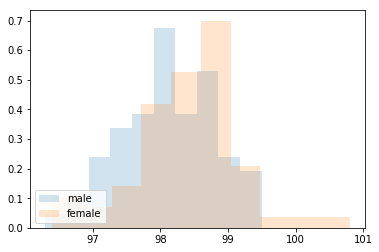

In [84]:
_ = plt.hist(male,bins=10,density=True,alpha=.2)
_ = plt.hist(female,bins=10,density=True,alpha = .2)
_ = plt.legend(['male','female'],loc='lower left')
plt.show()

Female Body Temperature Distribution is about .3 degrees greater than males, thus rejecing the hypothesis but it does not accept the alternative hypothesis.